In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('EV_Stations_data.csv')

print(df.info())

print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station Name              385 non-null    object
 1   Street Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access Days Time          385 non-null    object
 4   EV Level1 EVSE Num        385 non-null    object
 5   EV Level2 EVSE Num        385 non-null    object
 6   EV DC Fast Count          385 non-null    object
 7   EV Other Info             385 non-null    object
 8   New Georeferenced Column  385 non-null    object
dtypes: object(9)
memory usage: 27.2+ KB
None
Index(['Station Name', 'Street Address', 'City', 'Access Days Time',
       'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
       'EV Other Info', 'New Georeferenced Column'],
      dtype='object')


In [239]:
df.isnull().sum()

Station Name                0
Street Address              0
City                        0
Access Days Time            0
EV Level1 EVSE Num          0
EV Level2 EVSE Num          0
EV DC Fast Count            0
EV Other Info               0
New Georeferenced Column    0
dtype: int64

In [240]:
df['EV Level1 EVSE Num']=df['EV Level1 EVSE Num'].str.replace('NONE','0').astype(int)
df['EV Level2 EVSE Num']=df['EV Level2 EVSE Num'].str.replace('NONE','0').astype(int)
df['EV DC Fast Count']=df['EV DC Fast Count'].str.replace('NONE','0').astype(int)

df.info()


# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station Name              385 non-null    object
 1   Street Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access Days Time          385 non-null    object
 4   EV Level1 EVSE Num        385 non-null    int64 
 5   EV Level2 EVSE Num        385 non-null    int64 
 6   EV DC Fast Count          385 non-null    int64 
 7   EV Other Info             385 non-null    object
 8   New Georeferenced Column  385 non-null    object
dtypes: int64(3), object(6)
memory usage: 27.2+ KB


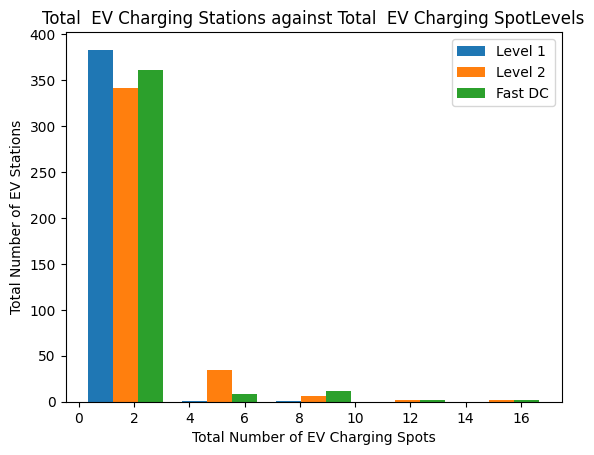

In [241]:
import seaborn as sns

import matplotlib.pyplot as plt


plt.hist([df['EV Level1 EVSE Num'],df['EV Level2 EVSE Num'],df['EV DC Fast Count']], bins=5, alpha=1, label=['Level 1', 'Level 2', 'Fast DC'])
plt.xlabel('Total Number of EV Charging Spots')
plt.ylabel('Total Number of EV Stations')
plt.legend()
plt.title('Total  EV Charging Stations against Total  EV Charging SpotLevels')
plt.show()


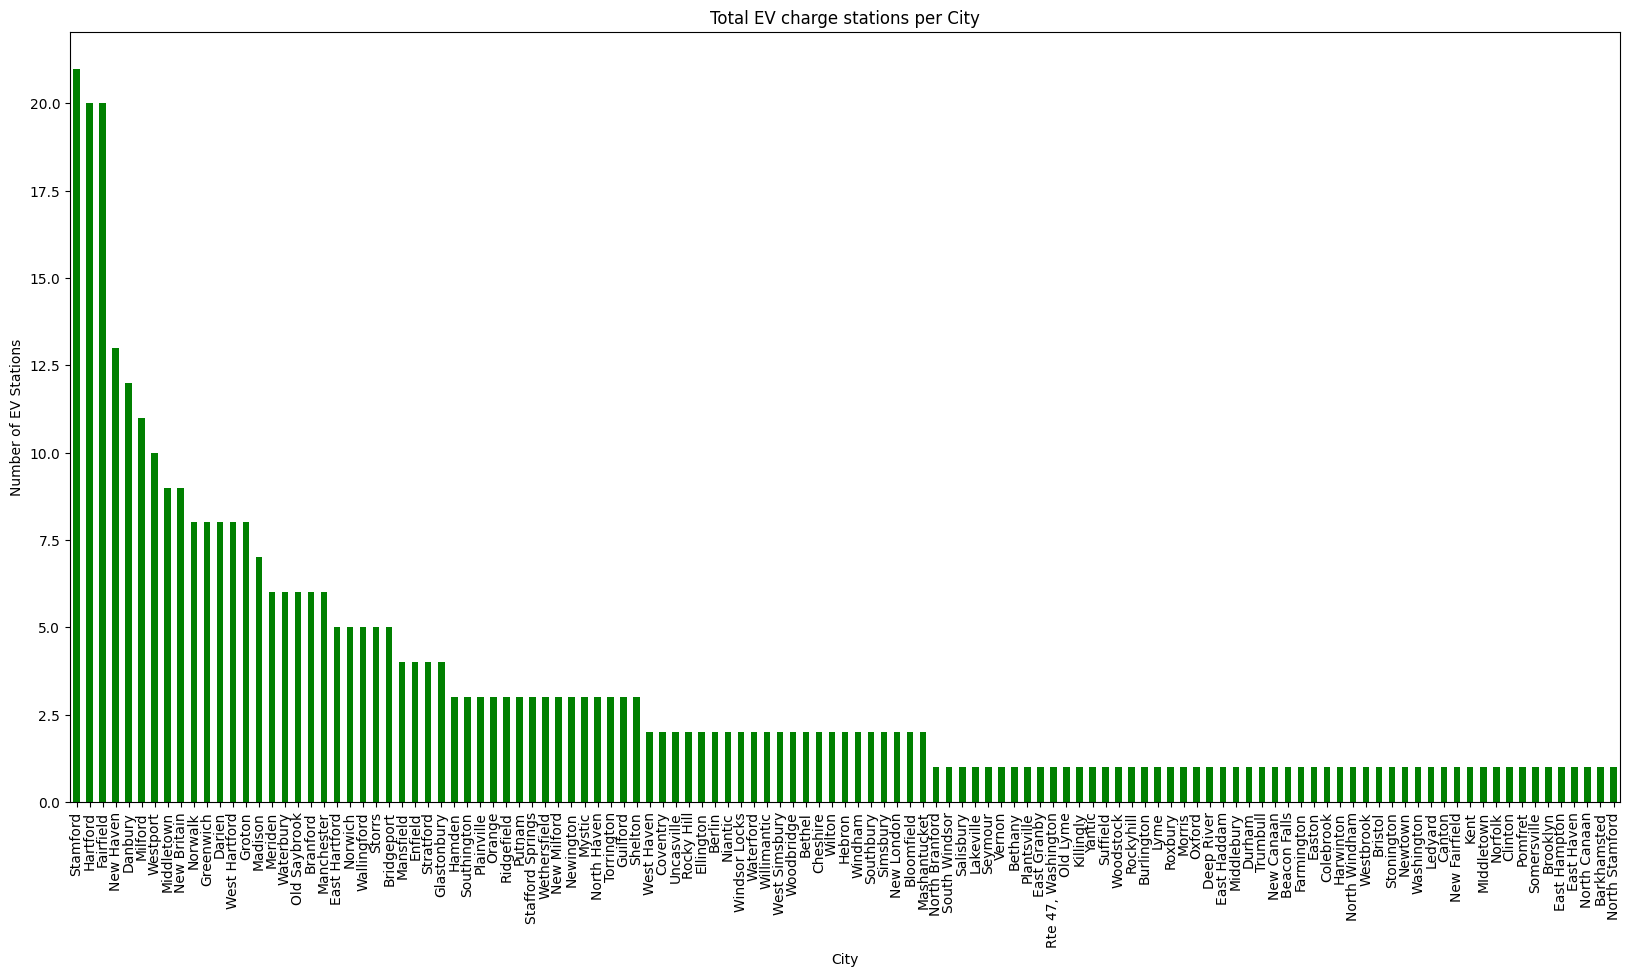

In [242]:
# getting the total number of EV charging stations per city
df['City'].value_counts().plot(kind='bar',color="green", figsize=(20,10))
plt.xlabel('City')
plt.ylabel('Number of EV Stations')
plt.title('Total EV charge stations per City')
plt.show()

    Total EV Count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

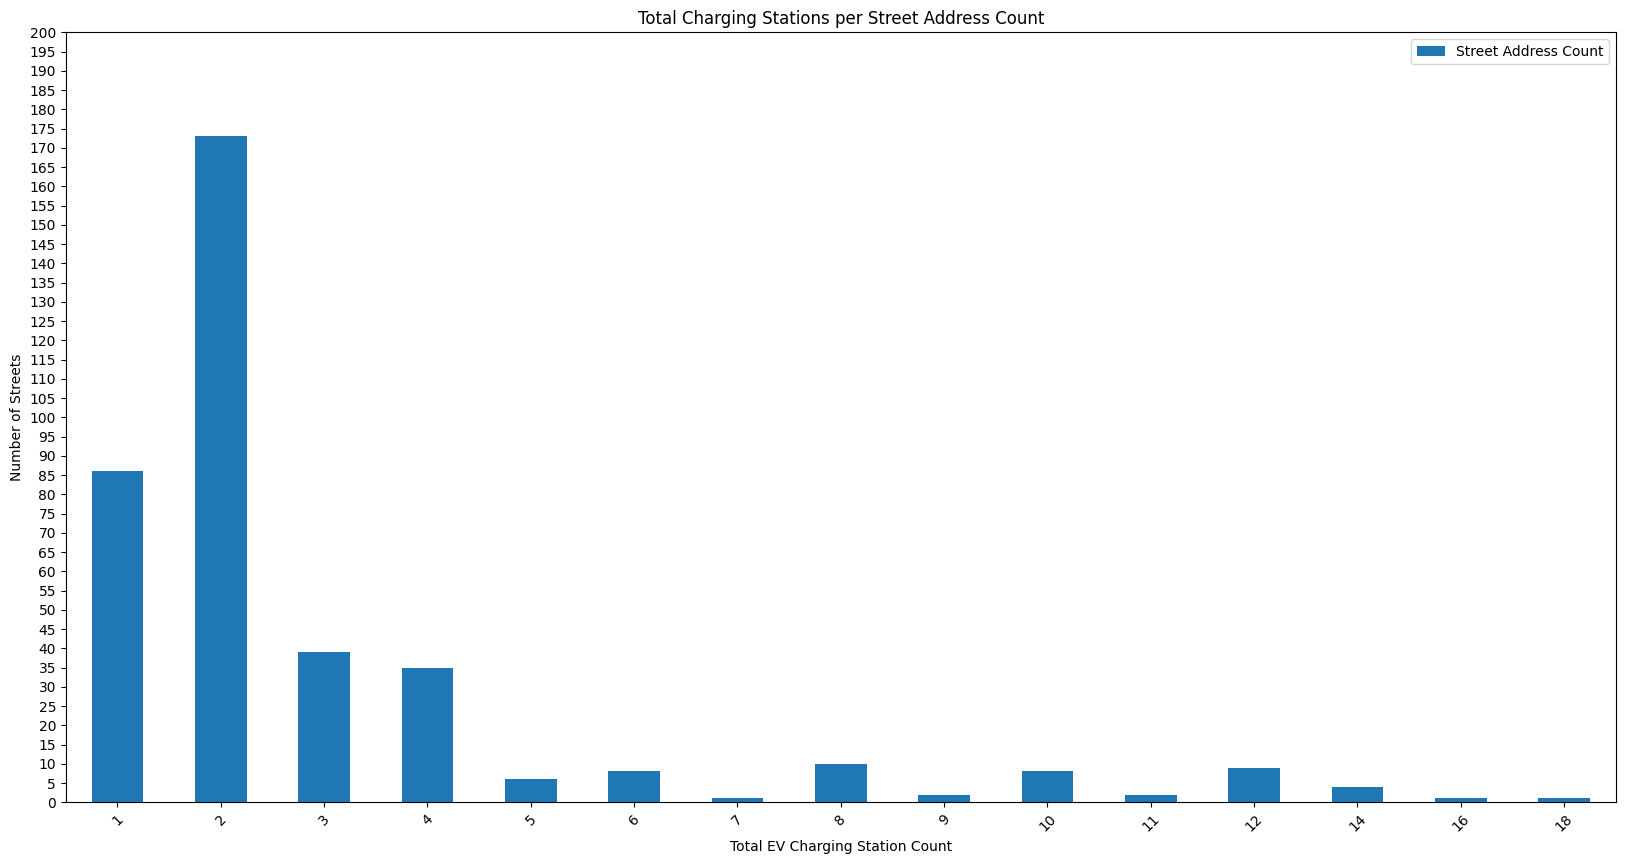

In [246]:

# Step 1: Create a mapping from street addresses to unique numbers
address_to_number = {address: i for i, address in enumerate(df['Street Address'].unique())}

# Map the street addresses in the DataFrame to these numbers
df['Address Number'] = df['Street Address'].map(address_to_number)

# test the mapping
# print(df[['Address Number','Street Address']].to_string())

# Group by 'Address Number' and sum the values for each level
grouped_data = df.groupby('Address Number')[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']].sum()

# Add a new column 'Total EV Count' that is the sum of all three levels for each 'Address Number'
grouped_data['Total EV Count'] = grouped_data.sum(axis=1)


# Merge the original DataFrame with the grouped data to associate 'Address Number' with 'Total EV Count'
df_merged = df.merge(grouped_data['Total EV Count'], left_on='Address Number', right_index=True)

# Now, group by 'Total EV Count' to aggregate cities (or street addresses) with the same total count
cities_grouped_by_ev_count = df_merged.groupby('Total EV Count')['Street Address'].apply(list).reset_index()

# This gives you a DataFrame where each 'Total EV Count' is associated with a list of cities having that count
print(cities_grouped_by_ev_count.to_string())

print(cities_grouped_by_ev_count.sum())

# Count the number of cities for each 'Total EV Count'
cities_grouped_by_ev_count['Street Address Count'] = cities_grouped_by_ev_count['Street Address'].apply(len)

# Plotting
cities_grouped_by_ev_count.plot(x='Total EV Count', y='Street Address Count', kind='bar', figsize=(20,10), xlabel='Total EV Charging Station Count', ylabel='Number of Streets')

plt.title('Total Charging Stations per Street Address Count')


plt.xticks(rotation=45) 
plt.yticks(np.arange(0,201,5))
plt.show()


